## Data Combination and Data Cleaning

**Speech Dataset**

In [50]:
# Load speech dataframe
import os
import numpy as np
import pandas as pd

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    #directory = "Session "+str(session)+" - "+str(1945+session)
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename), encoding="utf8")
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])

df_speech.tail()

,Session,Year,ISO-alpha3 Code,Speech
8476,75,2020,HRV,"Mr President, Excellencies\nAll protocol obser..."
8477,75,2020,GAB,"Mr. President, Majesties,\nLadies and Gentleme..."
8478,75,2020,MCO,"Mr. President of the General Assembly,\nMr. Se..."
8479,75,2020,AND,"Mr. President,\nMr. Secretary General,\nYour E..."
8480,75,2020,BHR,"In the name of Allah, the most gracious, the m..."


**Country-Name Dataset**

In [51]:
# Load UNSD dataframe(basically is the country-name dataset)
n = 16 #define the columns

# Load all the data using lineterminator = '\n' to get all the  
# columns that are misplaced because of the ',' inside them
unsd_df = pd.read_csv('UNSD — Methodology.csv', usecols=range(n), lineterminator='\n')
unsd_df

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries\r
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,012,DZ,DZA,NaN,NaN,NaN,Developing\r
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing\r
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing\r
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing\r
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x,Developing\r
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN,Developing\r
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x,Developing\r
247,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x,Developing\r


In [52]:
# Rename last column - remove the space(\s)
unsd_df.rename(columns={'Developed / Developing Countries\r': 'Developed / Developing Countries'}, inplace=True)

In [53]:
# Complete/Combine the name of the "Country or Area" that was misplaced into  
# the M49 Code column and adjust all other columns

for i,j in unsd_df["M49 Code"].items():
    if(len(j)>3):
        print(j)
        unsd_df.iloc[i, unsd_df.columns.get_loc('Country or Area')] += j
        unsd_df.iloc[i, unsd_df.columns.get_loc('M49 Code')] = unsd_df.iloc[i, unsd_df.columns.get_loc('ISO-alpha2 Code')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('ISO-alpha2 Code')] = unsd_df.iloc[i, unsd_df.columns.get_loc('ISO-alpha3 Code')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('ISO-alpha3 Code')] = unsd_df.iloc[i, unsd_df.columns.get_loc('Least Developed Countries (LDC)')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('Least Developed Countries (LDC)')] = unsd_df.iloc[i, unsd_df.columns.get_loc('Land Locked Developing Countries (LLDC)')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('Land Locked Developing Countries (LLDC)')] = unsd_df.iloc[i, unsd_df.columns.get_loc('Small Island Developing States (SIDS)')]        
        unsd_df.iloc[i, unsd_df.columns.get_loc('Small Island Developing States (SIDS)')] = unsd_df.iloc[i, unsd_df.columns.get_loc('Developed / Developing Countries')]
        unsd_df.iloc[i, unsd_df.columns.get_loc('Developed / Developing Countries')] = "Developing"

 Sint Eustatius and Saba
 Hong Kong Special Administrative Region
 Macao Special Administrative Region


In [54]:
unsd_df

,Global Code,Global Name,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name,Country or Area,M49 Code,ISO-alpha2 Code,ISO-alpha3 Code,Least Developed Countries (LDC),Land Locked Developing Countries (LLDC),Small Island Developing States (SIDS),Developed / Developing Countries
0,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Algeria,012,DZ,DZA,NaN,NaN,NaN,Developing\r
1,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Egypt,818,EG,EGY,NaN,NaN,NaN,Developing\r
2,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Libya,434,LY,LBY,NaN,NaN,NaN,Developing\r
3,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Morocco,504,MA,MAR,NaN,NaN,NaN,Developing\r
4,1,World,2.0,Africa,15.0,Northern Africa,NaN,NaN,Sudan,729,SD,SDN,x,NaN,NaN,Developing\r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Samoa,882,WS,WSM,NaN,NaN,x,Developing\r
245,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tokelau,772,TK,TKL,NaN,NaN,NaN,Developing\r
246,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tonga,776,TO,TON,NaN,NaN,x,Developing\r
247,1,World,9.0,Oceania,61.0,Polynesia,NaN,NaN,Tuvalu,798,TV,TUV,x,NaN,x,Developing\r


In [55]:
# Merge Speech and Country-Name dataframe
speech_and_unsd_df = pd.merge(unsd_df, df_speech, on="ISO-alpha3 Code")

# Select specific columns to the final Speech and Country-Name dataframe
speech_and_countryName_df = speech_and_unsd_df[['Region Name', 'Country or Area', 'Session', 'Year', 'Speech']].copy()
speech_and_countryName_df

,Region Name,Country or Area,Session,Year,Speech
0,Africa,Algeria,25,1970,1. The delegation of Algeria is very pleased ...
1,Africa,Algeria,26,1971,\n154.\t : It is not only in order to keep up ...
2,Africa,Algeria,27,1972,"Mr. President, in electing you to preside over..."
3,Africa,Algeria,28,1973,"﻿121.\tMr. President, since a tradition appear..."
4,Africa,Algeria,29,1974,"Mr. President, it would be ungracious of the r..."
...,...,...,...,...,...
8379,Oceania,Tuvalu,71,2016,On behalf of the Government and people of Tuva...
8380,Oceania,Tuvalu,72,2017,"Next week, on 1 October, Tuvalu will mark the ..."
8381,Oceania,Tuvalu,73,2018,"It gives me great pleasure, on behalf of the G..."
8382,Oceania,Tuvalu,74,2019,"On behalf of Tuvalu and on my own behalf, I co..."


**Happiness Dataset**

In [56]:
# Load hapiness dataframe
happinessdataframe = pd.read_excel('DataPanelWHR2021C2.xls', index_col=[0,1])
happinessdataframe

Life Ladder  Log GDP per capita  Social support  \
Country name year                                                    
Afghanistan  2008     3.723590            7.370100        0.450662   
             2009     4.401778            7.539972        0.552308   
             2010     4.758381            7.646709        0.539075   
             2011     3.831719            7.619532        0.521104   
             2012     3.782938            7.705479        0.520637   
...                        ...                 ...             ...   
Zimbabwe     2016     3.735400            7.984372        0.768425   
             2017     3.638300            8.015738        0.754147   
             2018     3.616480            8.048798        0.775388   
             2019     2.693523            7.950132        0.759162   
             2020     3.159802            7.828757        0.717243   

                   Healthy life expectancy at birth  \
Country name year                                     
Afghanistan  2008                         50.799999   
             2009                         51.200001   
             2010                         51.599998   
             2011                         51.919998   
             2012                         52.240002   
...                                             ...   
Zimbabwe     2016                         54.400002   
             2017                         55.000000   
             2018                         55.599998   
             2019                         56.200001   
             2020                         56.799999   

                   Freedom to make life choices  Generosity  \
Country name year                                             
Afghanistan  2008                      0.718114    0.167640   
             2009                      0.678896    0.190099   
             2010                      0.600127    0.120590   
             2011                      0.495901    0.162427   
             2012                      0.530935    0.236032   
...                                         ...         ...   
Zimbabwe     2016                      0.732971   -0.094634   
             2017                      0.752826   -0.097645   
             2018                      0.762675   -0.068427   
             2019                      0.631908   -0.063791   
             2020                      0.643303   -0.008696   

                   Perceptions of corruption  Positive affect  Negative affect  
Country name year                                                               
Afghanistan  2008                   0.881686         0.517637         0.258195  
             2009                   0.850035         0.583926         0.237092  
             2010                   0.706766         0.618265         0.275324  
             2011                   0.731109         0.611387         0.267175  
             2012                   0.775620         0.710385         0.267919  
...                                      ...              ...              ...  
Zimbabwe     2016                   0.723612         0.737636         0.208555  
             2017                   0.751208         0.806428         0.224051  
             2018                   0.844209         0.710119         0.211726  
             2019                   0.830652         0.716004         0.235354  
             2020                   0.788523         0.702573         0.345736  

[1949 rows x 9 columns]

In [57]:
# happinessdataframe rename index from 'Country name' to'Country or Area'
happinessdataframe.index.names = ['Country or Area', 'Year']

In [58]:
# Merge Speech-Country-Name dataframe with the Happiness dataframe 
# on the columns 'Country or Area' and 'Year' 
all_data_df = pd.merge(speech_and_countryName_df, happinessdataframe, left_on=['Country or Area','Year'], right_on=['Country or Area','Year'], right_index=True)

# Create indexes on the columns 'Country or Area' and 'Year' 
all_data_df = all_data_df.set_index(['Country or Area','Year'])

# Create two dataframes one for speeches tokenized, and one for speeches tokennized and FreqDist
all_data_tokenized_df = all_data_df.copy()
all_data_tokenized_FreqDist_df = all_data_df.copy()
data_word_vector_df = all_data_df[["Speech"]].copy()

Download (in case you haven't already done so)

In [59]:
#import nltk

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('vader_lexicon')

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist
import string

# Create all punctuation string variable
punct = '!"#$%&\'()*+0123456789,’-—./:;<=>?@[\\]^_`{}~[\n]'
# Create a mapping table that will have as key the punctuation and as value an empty string
transtab = str.maketrans(dict.fromkeys(punct, ''))

# Loop through all the cells of "Speech" column
for county_year_index,cell in data_word_vector_df["Speech"].items():
    # Remove all punctuations and convert the text to lowercase
    words = word_tokenize(cell.translate(transtab).lower())
    # Create an array that has all the words that don't give information
    notuseful_words = stopwords.words("english")
    # Create and fill an empty array to gather all the important words of every "Speech" cell
    useful_words = []
    for w in words:
        if (w not in notuseful_words):
            useful_words.append(w)
    # Fill the dataframe with the text of "Speech" for each cell
    data_word_vector_df["Speech"][i] = ' '.join(useful_words)
    a = ' '.join(useful_words)


In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(data_word_vector_df["Speech"])
pd.DataFrame(X_train_counts.toarray() ,columns= count_vect.get_feature_names())

,00,000,001,00394,005,01,019,02,024,03,...,керек,мedya,не,ойлап,сезбек,сүймек,сөйлемек,тhomson,қарекет,қылмақ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1660,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1662,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.probability import FreqDist
import string

# Create all punctuation string variable
punct = '!"#$%&\'()*+0123456789,’-—./:;<=>?@[\\]^_`{}~[\n]'
# Create a mapping table that will have as key the punctuation and as value an empty string
transtab = str.maketrans(dict.fromkeys(punct, ''))

# Loop through all the cells of "Speech" column
for i,j in all_data_df["Speech"].items():
    # Remove all punctuations and convert the text to lowercase
    words = word_tokenize(j.translate(transtab).lower())
    # Create an array that has all the words that don't give information
    sw = stopwords.words("english")
    # Create and fill an empty array to gather all the important words of every "Speech" cell
    no_sw = []
    for w in words:
        if (w not in sw):
            no_sw.append(w)
    # Fill the dataframe with the tokenized "Speech" for each cell
    all_data_tokenized_df["Speech"][i] = no_sw
    # Fill the dataframe with the word-count of the tokenized "Speech" for each cell
    all_data_tokenized_FreqDist_df["Speech"][i] = FreqDist(no_sw)

<ipython-input-62-60dcb51381a0>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_tokenized_df["Speech"][i] = no_sw
<ipython-input-62-60dcb51381a0>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_tokenized_FreqDist_df["Speech"][i] = FreqDist(no_sw)


Just some 1 visualization for better understanding and some useful keywords

In [63]:
all_data_tokenized_df.tail(10)

Region Name  Session  \
Country or Area Year                        
New Zealand     2011     Oceania       66   
                2012     Oceania       67   
                2013     Oceania       68   
                2014     Oceania       69   
                2015     Oceania       70   
                2016     Oceania       71   
                2017     Oceania       72   
                2018     Oceania       73   
                2019     Oceania       74   
                2020     Oceania       75   

                                                                 Speech  \
Country or Area Year                                                      
New Zealand     2011  [say, maori, peoples, voices, greetings, greet...   
                2012  [﻿i, bring, greetingsfrom, south, pacific, pas...   
                2013  [greetings, let, begin, congratulating, presid...   
                2014  [honour, address, general, assembly, today, be...   
                2015  [seventieth, anniversary, united, nations, goo...   
                2016  [special, pleasure, speak, general, assembly, ...   
                2017  [greater, demonstration, ability, united, nati...   
                2018  [e, nga, mana, nul, nga, whenua, te, aotena, k...   
                2019  [ei, nga, tangata, katoa, e, manaa, kitia, ana...   
                2020  [e, nga, mana, e, nga, reo, rau, rangatira, te...   

                      Life Ladder  Log GDP per capita  Social support  \
Country or Area Year                                                    
New Zealand     2011     7.190638           10.536145        0.953650   
                2012     7.249630           10.552812        0.930029   
                2013     7.280152           10.571076        0.958153   
                2014     7.305892           10.591587        0.942381   
                2015     7.418121           10.608247        0.987343   
                2016     7.225688           10.623369        0.936603   
                2017     7.327183           10.633281        0.954921   
                2018     7.370286           10.660436        0.953863   
                2019     7.205174           10.666336        0.938821   
                2020     7.257382           10.600457        0.951991   

                      Healthy life expectancy at birth  \
Country or Area Year                                     
New Zealand     2011                         72.120003   
                2012                         72.239998   
                2013                         72.360001   
                2014                         72.480003   
                2015                         72.599998   
                2016                         72.800003   
                2017                         73.000000   
                2018                         73.199997   
                2019                         73.400002   
                2020                         73.599998   

                      Freedom to make life choices  Generosity  \
Country or Area Year                                             
New Zealand     2011                      0.934769    0.284323   
                2012                      0.901853    0.287335   
                2013                      0.944000    0.236998   
                2014                      0.931882    0.347953   
                2015                      0.941784    0.329437   
                2016                      0.926576    0.265629   
                2017                      0.942279    0.294139   
                2018                      0.949300    0.119827   
                2019                      0.912042    0.156747   
                2020                      0.918155    0.125260   

                      Perceptions of corruption  Positive affect  \
Country or Area Year                                               
New Zealand     2011                   0.269330         0.863913   
        

In [64]:

all_data_tokenized_FreqDist_df["Speech"][4]

FreqDist({'united': 13, 'nations': 13, 'international': 11, 'countries': 9, 'algeria': 7, 'respect': 7, 'security': 6, 'challenges': 6, 'development': 6, 'situation': 5, ...})

In [65]:
all_data_tokenized_FreqDist_df["Speech"][19].most_common(30)

[('international', 28),
 ('world', 14),
 ('order', 13),
 ('terrorism', 13),
 ('nations', 13),
 ('united', 12),
 ('economic', 12),
 ('arab', 12),
 ('egypt', 11),
 ('egypts', 11),
 ('development', 10),
 ('principles', 10),
 ('based', 10),
 ('also', 9),
 ('peace', 9),
 ('security', 9),
 ('region', 9),
 ('political', 9),
 ('opportunity', 8),
 ('states', 8),
 ('crises', 7),
 ('people', 7),
 ('today', 7),
 ('countries', 6),
 ('stability', 6),
 ('among', 6),
 ('interests', 6),
 ('time', 5),
 ('well', 5),
 ('possible', 5)]

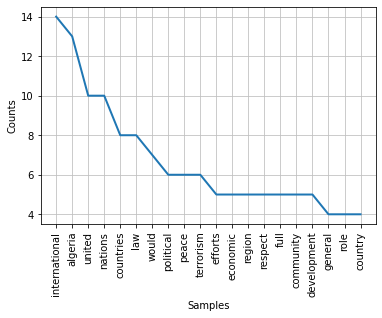

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [66]:
all_data_tokenized_FreqDist_df["Speech"][1].plot(20)

**Data Cleaning**

In [67]:
# Observe the mean values for each numerical column
all_data_tokenized_FreqDist_df.describe()

,Session,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1664.000000,1664.000000,1652.000000,1654.000000,1664.000000,1639.000000,1609.000000,1565.000000,1645.000000,1650.000000
mean,68.234375,5.460666,9.361959,0.812139,63.423119,0.745001,-0.002921,0.746757,0.711446,0.268695
std,4.162990,1.135965,1.159358,0.121807,7.596992,0.144166,0.160917,0.190924,0.108065,0.081285
min,60.000000,2.375092,6.635322,0.290184,32.299999,0.257534,-0.335040,0.035198,0.321690,0.095490
25%,65.000000,4.610970,8.449862,0.746523,58.670000,0.650378,-0.118097,0.692892,0.627798,0.207799
50%,68.000000,5.354053,9.483177,0.839411,65.300003,0.766716,-0.024666,0.804879,0.725461,0.260161
75%,72.000000,6.294377,10.310630,0.908301,68.704998,0.861427,0.084854,0.874849,0.802440,0.319142
max,75.000000,8.018934,11.648169,0.987343,77.099998,0.985178,0.698099,0.983276,0.943621,0.599335


In [68]:
# Count how many NaN values we have per column
all_data_tokenized_FreqDist_df.isnull().sum()

Region Name                          0
Session                              0
Speech                               0
Life Ladder                          0
Log GDP per capita                  12
Social support                      10
Healthy life expectancy at birth     0
Freedom to make life choices        25
Generosity                          55
Perceptions of corruption           99
Positive affect                     19
Negative affect                     14
dtype: int64

In [69]:
# Here is depicted that the null values are all float64 type 
all_data_tokenized_FreqDist_df.dtypes

Region Name                          object
Session                               int64
Speech                               object
Life Ladder                         float64
Log GDP per capita                  float64
Social support                      float64
Healthy life expectancy at birth    float64
Freedom to make life choices        float64
Generosity                          float64
Perceptions of corruption           float64
Positive affect                     float64
Negative affect                     float64
dtype: object

Keep one of the two approaches !!!

In [70]:
# Approach 1


# Replace NaN with the mean of every column
# all_data_tokenized_FreqDist_mean_df =all_data_tokenized_FreqDist_df.fillna(all_data_tokenized_FreqDist_df.mean())
# all_data_tokenized_mean_df =all_data_tokenized_df.fillna(all_data_tokenized_df.mean())

In [71]:
# Approach 2

# Remove all NaN values
all_data_tokenized_FreqDist_df =all_data_tokenized_FreqDist_df.dropna()
all_data_tokenized_df =all_data_tokenized_df.dropna()

In [72]:
all_data_tokenized_df.shape

(1507, 12)

In [73]:
all_data_tokenized_FreqDist_df.shape

(1507, 12)

In [74]:
# The only column that we should consider if it worthy to remove duplicates is "Session"

# Food for thought
# It is possible that there are two sessions rows with the same session for two different countries

# all_data_tokenized_FreqDist_mean_df = all_data_tokenized_FreqDist_mean_df.drop_duplicates(subset=['Session'])
# len(all_data_tokenized_df)

In [75]:
# Print the available values in column "Session"
a = all_data_tokenized_FreqDist_df['Session'].unique()
print(sorted(a))

[60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Removing Outliers

In [76]:
from scipy import stats

# A basic way to remove outliers with Z-score
# Reference : https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-pandas-data-frame

# I am not sure if we should remove the outliers ????

numeric_df = all_data_tokenized_FreqDist_df[['Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']].copy()
all_data_tokenized_FreqDist_outliers_df = all_data_tokenized_FreqDist_df[(np.abs(stats.zscore(numeric_df)) < 3).all(axis=1)]

In [77]:
all_data_tokenized_FreqDist_outliers_df.shape

(1441, 12)

### Data Visualizations for the Introduction section 

In [78]:
speech_and_countryName_df.count()

Region Name        8384
Country or Area    8384
Session            8384
Year               8384
Speech             8384
dtype: int64

#### #1 Number of countries participating in UN speaches over the years

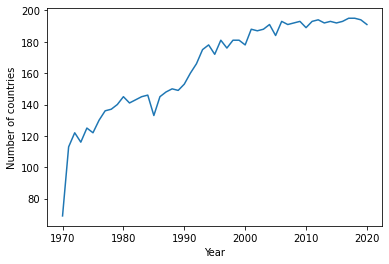

<Figure size 432x288 with 0 Axes>

In [79]:
import matplotlib.pyplot as plt

grouped_by_year = speech_and_countryName_df.groupby(['Year'])['Speech'].count()
fig1 = grouped_by_year.plot(x='Year')

plt.xlabel('Year')
plt.ylabel('Number of countries')
plt.show()
plt.draw()
fig1.figure.savefig('Figure1.eps')


#### #2 DV2: How often did a country participate in the speech over the year

In [80]:
import geopandas as gpd
import pandas as pd
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

grouped_by_country = speech_and_countryName_df.groupby(['Country or Area'])['Speech'].count()
df1= pd.DataFrame(grouped_by_country.index)
df2 = pd.DataFrame(grouped_by_country.values, columns=['Speech'])
grouped_by_country_df = df1.join(df2)

In [81]:
#to manage inconsistencies between name sof countries in different datasets
r = {'Argentina': 'Antigua and Barbuda',
  'Bolivia': 'Bolivia (Plurinational State of)',
  'Bosnia and Herz.': 'Bosnia and Herzegovina',
  'Brunei': 'Brunei Darussalam',
  'Central African Rep.': 'Central African Republic',
  'North Korea': "Democratic People's Republic of Korea",
  'Dem. Rep. Congo': 'Democratic Republic of the Congo',
  'Dominican Rep.': 'Dominican Republic',
  'Eq. Guinea': 'Equatorial Guinea',
  'eSwatini': 'Eswatini',
  'Iran': 'Iran (Islamic Republic of)',
  'Laos': "Lao People's Democratic Republic",
  'Macedonia': 'North Macedonia',
  'South Korea': 'Republic of Korea',
  'Moldova': 'Republic of Moldova',
  'Russia': 'Russian Federation',
  'Solomon Is.': 'Solomon Islands',
  'S. Sudan': 'South Sudan',
  'Palestine': 'State of Palestine',
  'Syria': 'Syrian Arab Republic',
  'United Kingdom': 'United Kingdom of Great Britain and Northern Ireland',
  'Tanzania': 'United Republic of Tanzania',
  'Venezuela': 'Venezuela (Bolivarian Republic of)',
  'Vietnam': 'Viet Nam'}

world2 = world.replace(to_replace=r ,value=None)
world_speeched_final = world2.merge(grouped_by_country_df, how="right", left_on=['name'], right_on=['Country or Area'] )

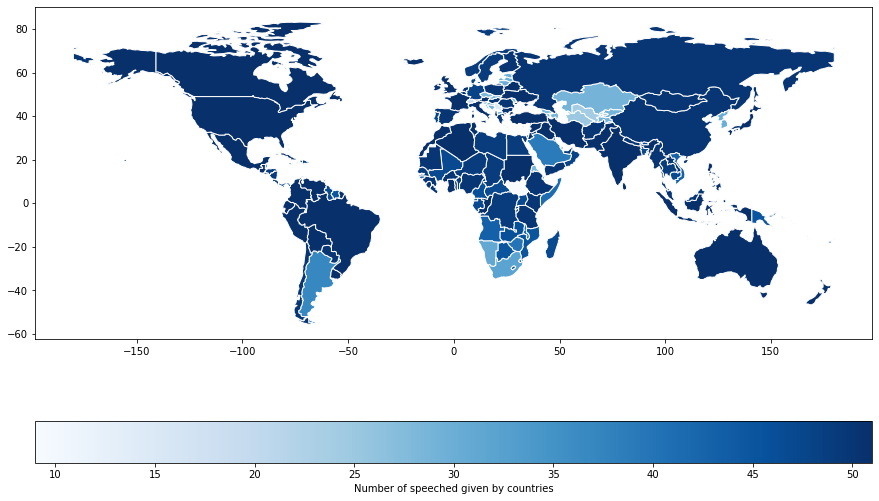

In [82]:
import matplotlib.pyplot as plt

ax = world_speeched_final.plot('Speech',
                           figsize=(15,10),
                           legend=True,
                           edgecolor="white",cmap='Blues',
                           legend_kwds={"label":"Number of speeched given by countries", "orientation":"horizontal"})

ax.figure.savefig('Figure2.eps')

In [83]:
#The following do not have a match in the world dataset not every countries has the coordinates in the world dataset
#world_speeched_final[world_speeched_final['pop_est'].isna()]

#### #3 World cloud after tokenizing

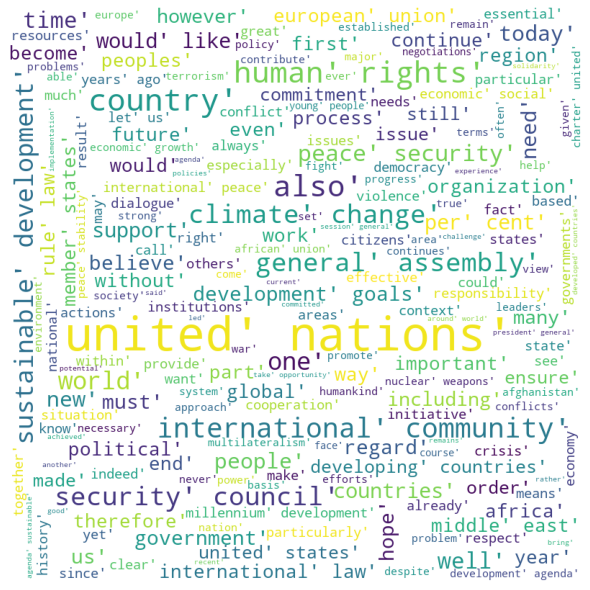

In [84]:
# importing all necessary modules

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

comment_words = ""

# iterate through dataframe
for val in all_data_tokenized_df["Speech"]:
     
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()

    # Converts each token into lowercase

    comment_words += ''.join(tokens)



wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(comment_words)


 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()